#[Colaboratory](https://research.google.com/colaboratory/faq.html)                           ===by----- ![Google](https://www.google.com/images/logos/google_logo_41.png) 

**Mount Drive, and Get Operating System and Modules Info ----**

In [ ]:
# Mount Google Drive to get data.
#from google.colab import drive
#drive.mount('/content/drive')

# Delete sample data if exists.
!if [ -d "/content/sample_data" ]; then rm -Rf /content/sample_data; fi

# Import necessary Modules
from os import makedirs
from shutil import rmtree, move, copy
import numpy as np, pandas as pd, glob, os


# Function to make directory or path
def make_Directory(directory='sample/path'):
  try:
    # Try to create sub-directory of data.
    makedirs(directory)
  except FileExistsError:
    print('Directory already exits...')
    rmtree(directory)
    print('Recreating directory...')
    try :
      makedirs(directory)
    except Exception as e:
      # If any unwanted error occurred then stop further programme execution.
      print('FAILED to PROCESS further -->!. Exception: -->',e)
      raise KeyboardInterrupt
    else:
      # Print directory created.
      print ("Successfully created the directory %s" % directory)
  except Exception as e:
    # If any unwanted error occurred then stop further programme execution.
    print('FAILED to PROCESS further -->!. Exception: -->',e)
    raise KeyboardInterrupt
  else:
    # Print directory created.
    print ("Successfully created the directory %s" % directory)

from time import ctime 
print('Now:',ctime())

import platform,subprocess
print('Operating platform:',platform.system())
print('\n','#'*100,'\n',sep='')
#print('Tensorflow and Keras Info: ---')
#print()
#!pip show tensorflow
#print()
#!pip show keras

Now: Sun Nov  1 03:44:22 2020
Operating platform: Linux

####################################################################################################



**Get CPU-Info and Get Memory Info ----**

In [ ]:
# CPU-Info
#if   platform.system() == "Windows": print(platform.processor())
#elif platform.system() == "Darwin" : print(subprocess.check_output(['/usr/sbin/sysctl', "-n", "machdep.cpu.brand_string"]).strip().decode('ascii'))
#elif platform.system() == "Linux"  : print(subprocess.check_output("cat /proc/cpuinfo", shell=True).strip().decode('ascii'))
#else : print('Failed to get info...')
#del platform

# Memory Info
#!cat /proc/meminfo

In [ ]:
#!lscpu |grep 'Model name:'
# No.of sockets i.e available slots for physical processors
#!lscpu | grep 'Socket(s):'
# No.of cores each processor is having 
#!lscpu | grep 'Core(s) per socket:'
# No.of threads each core is having
#!lscpu | grep 'Thread(s) per core:'
#!lscpu | grep "L3 cache:"
# If it had turbo boost it would've shown Min and Max MHz also but it is only showing current frequency this means it always operates at shown frequency
#!lscpu | grep "MHz"
# Memory that we can use
#print('Memory that we can use:',end=' ')
#!free -h --si | awk  '/Mem:/{print $2}'
# Hard disk space that we can use
#print('Hard disk space that we can use:',end=' ')
#!df -h / | awk '{print $4}' 

**Get GPU-Info ----**

Source: https://colab.research.google.com/drive/151805XTDg--dgHb3-AXJCpnWaqRhop_2

In [ ]:
# GPU count and name
#!nvidia-smi -L
# Use this command to see GPU activity while doing Deep Learning tasks, for this command 'nvidia-smi' and for above one to work, go to 'Runtime > change runtime type > Hardware Accelerator > GPU'
#!nvidia-smi

**Physical Devices Available Info---**

In [1]:
#from tensorflow.config import list_physical_devices
# Source: https://www.tensorflow.org/api_docs/python/tf/config
#from tensorflow.test import is_built_with_cuda 
# Source: https://www.tensorflow.org/api_docs/python/tf/test/is_built_with_cuda
# Parent Source: https://www.tensorflow.org/api_docs/python/tf/test

#print('Physical Devices Available ---')
#for number,device in enumerate(list_physical_devices(device_type=None)):
#  print(number,':',device)
#print('Is TensorFlow was build with CUDA support?',is_built_with_cuda())

#del number,device,list_physical_devices,is_built_with_cuda

**TPU info and configuration----**

Source: [TPUs in Colab](ttps://colab.research.google.com/notebooks/tpu.ipynb#scrollTo=ovFDeMgtjqW4) or [07_Keras_Flowers_TPU_xception_fine_tuned_best.ipynb](https://colab.research.google.com/github/GoogleCloudPlatform/training-data-analyst/blob/master/courses/fast-and-lean-data-science/07_Keras_Flowers_TPU_xception_fine_tuned_best.ipynb#scrollTo=j4AAIjcoOB_K)


[tensorflow.distribute.cluster_resolver](https://www.tensorflow.org/api_docs/python/tf/distribute/cluster_resolver): This library contains all implementations of ClusterResolvers. ClusterResolvers are a way of specifying cluster information for distributed execution. Built on top of existing ClusterSpec framework, ClusterResolvers are a way for TensorFlow to communicate with various cluster management systems (e.g. GCE, AWS, etc...).

**[Distributed training with Keras](https://www.tensorflow.org/tutorials/distribute/keras)** ---

The [```tf.distribute.Strategy```](https://www.tensorflow.org/api_docs/python/tf/distribute/Strategy) API provides an abstraction for distributing your training across multiple processing units. The goal is to allow users to enable distributed training using existing models and training code, with minimal changes.

This tutorial uses the [```tf.distribute.MirroredStrategy```](https://www.tensorflow.org/api_docs/python/tf/distribute/MirroredStrategy), which does in-graph replication with synchronous training on many GPUs on one machine. Essentially, it copies all of the model's variables to each processor. Then, it uses [all-reduce](http://mpitutorial.com/tutorials/mpi-reduce-and-allreduce/) to combine the gradients from all processors and applies the combined value to all copies of the model.

MirroredStrategy is one of several distribution strategy available in TensorFlow core. You can read about more strategies at [distribution strategy guide](https://www.tensorflow.org/guide/distributed_training).






In [ ]:
# tensorflow.keras.backend.clear_session: -- Destroys the current TF graph and session, and creates a new one.
# Source: https://www.tensorflow.org/api_docs/python/tf/keras/backend/clear_session
from tensorflow.keras.backend import clear_session
from tensorflow.distribute.cluster_resolver import TPUClusterResolver
# Source: https://www.tensorflow.org/api_docs/python/tf/distribute/cluster_resolver/TPUClusterResolver
from tensorflow.config import experimental_connect_to_cluster,list_logical_devices
# Source: https://www.tensorflow.org/api_docs/python/tf/config
from tensorflow.tpu.experimental import initialize_tpu_system
# Source: https://www.tensorflow.org/api_docs/python/tf/tpu/experimental/initialize_tpu_system
from tensorflow.distribute import TPUStrategy
# Source: https://www.tensorflow.org/api_docs/python/tf/distribute/experimental/TPUStrategy

clear_session()
resolver = TPUClusterResolver('grpc://' + os.environ['COLAB_TPU_ADDR'])
experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
initialize_tpu_system(resolver)
print('All devices: --------- >')
for tdevices in list_logical_devices('TPU'):
  print(tdevices)
strategy = TPUStrategy(resolver)

INFO:tensorflow:Initializing the TPU system: grpc://10.115.98.210:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.115.98.210:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices: --------- >
LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')
LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU')
LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU')
LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU')
LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU')
LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU')
LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU')
LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU')
INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


#Load Data from Google Drive and Splitting Data into --- Train, Valid and Test Subset. 

The basic idea is to divide the dataset into mainly into two subsets – one subset is used for training while the other subset is left out and the performance of the final model is evaluated on it. The further first subset is divided into train subset and valid subset for training and validation. The main purpose of cross-validation is to achieve a stable and confident estimate of the model performance.

Steps: -->

* Step 1: Loading image data form alredy converted images to numpy array and saved into Numpy array fromat from dirve at "*/content/drive/My Drive/Data/DataInNpAry*" from files **XData.npy** and **yLables.npy**. 
* Step 2: Using [*class* **sklearn.model_selection.train_test_split()**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) - - - - - - 
  * Split data into train and test subset in ratio 90:10 i.e. 90% for purpose training and 10% for testing purpose. 
  * Further again, Train subset is divided into train and valid (in rato ~ 67:33 i.e 67% of 90% in training and 33% of 90% in validation).
* Step 3: Using class [tensorflow.keras.preprocessing.image.ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) - and method [flow](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow) to apply data augmentation on Train sub-set only [[Source]](). And finally converting augmented data again to numpy array (i.e xTrain, yTrain).

Finally we will have data in: **train, valid and test subset** in ratio ~ **60:30:10** respectively.

Note: Loaded image arrays are all-ready rescaled to 1/255.


**Step 1: Load Data from Google Drive ---**

In [ ]:
p_Directory = '/content/drive/My Drive/data/isic_archive_data/as_numpy_array_original/image_array_224x224x3'

# Note: run if previous data exits... 
# at /content/drive/My Drive/data/isic_archive_data/as_numpy_array_original/image_array_224x224x3

# Loading data and lables from drive if exits
try :
  os.chdir(p_Directory)
  # Loading image numpy arrays 
  XData = np.load('data.npy')

  # Loading labels
  yLabels = np.asarray(np.load('labels.npy'),dtype=np.uint8)

  print('Data successfully loaded.')
  print('Total images array loaded:',XData.shape[0])
  print('Each image shape: ',XData.shape[1:])
  print('Total labels:',yLabels.shape[0])

except ValueError:
  print('Fail to load file')
  print('Error --> ValueError: The file contains an object array, but allow_pickle=False given.')

except IOError:
  print('Fail to load file')
  print('Error --> IOError: The input file does not exist or cannot be read.')

Data successfully loaded.
Total images array loaded: 4570
Each image shape:  (224, 224, 3)
Total labels: 4570


**Step 2: Split Data using class sklearn.model_selection.train_test_split**

In [ ]:
from sklearn.model_selection import train_test_split

# Fixing Randomness
R_State = 101
# Shuffle Data
shuffleData = True


# Step 2: Splitting Data --> Train and Test
# Test Data percentage -- 10% of Over all Data
testDataSize = 0.10
xTrain,xTest,yTrain,yTest = train_test_split(XData,yLabels,test_size=testDataSize,random_state=R_State,shuffle=shuffleData)
#print('Train data size:',xTrain.shape,' Labels:',yTrain.shape)
#print('Test data size:',xTest.shape,' Labels:',yTest.shape)


# Step 3: Splitting Traning Data --> Train and Valid
# Valid Data percentage -- 33% of Over all Data.
validDataSize = 0.33
xTrain,xValid,yTrain,yValid = train_test_split(xTrain,yTrain,test_size=validDataSize,random_state=R_State,shuffle=shuffleData)

print('Train data size:',xTrain.shape,' Labels:',yTrain.shape)
print('Valid data size:',xValid.shape,' Labels:',yValid.shape)
print('Test data size:',xTest.shape,' Labels:',yTest.shape)
print('Ratio: {} : {} : {}'.format(*np.round(np.asarray([xTrain.shape[0],xValid.shape[0],xTest.shape[0]])/XData.shape[0]*100),decimal=2))

# Save RAM --
del XData,yLabels,R_State,shuffleData,testDataSize,validDataSize,train_test_split

Train data size: (2755, 224, 224, 3)  Labels: (2755,)
Valid data size: (1358, 224, 224, 3)  Labels: (1358,)
Test data size: (457, 224, 224, 3)  Labels: (457,)
Ratio: 60.0 : 30.0 : 10.0


**Step 3: Data Augmentation - only on Train Data**

Generate batches of tensor image data with real-time data augmentation.

In [ ]:
from  tensorflow.keras.preprocessing.image import ImageDataGenerator

# ReScale Size
#rScale = 1.0/255 # As images are already rescaled.
# Rotation, Width and Height shift, and zoom range
rRange,widthShift,heightShift,zoom = 180,0.15,0.15,0.25
# Horizontal and Vertical Flip
Hflip,Vflip=True,True 

# Source: https://www.tensorflow.org/tutorials/images/classification#put_it_all_together
TrainDataGen = ImageDataGenerator(featurewise_center=False, samplewise_center=False,featurewise_std_normalization=False, 
                                  samplewise_std_normalization=False,zca_whitening=False,zca_epsilon=1e-06,rotation_range=rRange,
                                  width_shift_range=widthShift,height_shift_range=heightShift,brightness_range=None, shear_range=0.0, 
                                  zoom_range=zoom,channel_shift_range=0.0,fill_mode='nearest',cval=0.0,horizontal_flip=Hflip,
                                  vertical_flip=Vflip,rescale=None,preprocessing_function=None,data_format=None,
                                  validation_split=0.0,dtype=None)


# Source: https://www.tensorflow.org/tutorials/images/classification#create_validation_data_generator
# Generally, only apply data augmentation to the training examples. In this case, we don't apply Data augmentation to 
# validation (and also for test) images.

################################################################################################################################################################

R_State = None
shuffleData = False
# Train Batch Size 
BSize = xTrain.shape[0]

# Generating batches of tensor image data of Train Data with Train data augmentation (i.e. TrainDataGen).
TrainData = TrainDataGen.flow(xTrain,y=yTrain,batch_size=BSize,shuffle=shuffleData,sample_weight=None,seed=R_State,
                              save_to_dir=None,save_prefix='',save_format='png',subset=None)

print('Train Data shape:',TrainData.x.shape)
print('Train Batch size:',TrainData.batch_size,'; Number of Train Batches:',TrainData.x.shape[0]//TrainData.batch_size)

del xTrain, yTrain
xTrain, yTrain = TrainData.next()

del rRange,widthShift,heightShift,zoom,Hflip,Vflip,R_State,shuffleData,BSize
del TrainDataGen,TrainData,ImageDataGenerator

print('After data augmentation Train data size:',xTrain.shape,' Labels size:',yTrain.shape)

Train Data shape: (2755, 224, 224, 3)
Train Batch size: 2755 ; Number of Train Batches: 1
After data augmentation Train data size: (2755, 224, 224, 3)  Labels size: (2755,)


#Visualize training images:

Visualize the training images by extracting a random two images from the training generator.

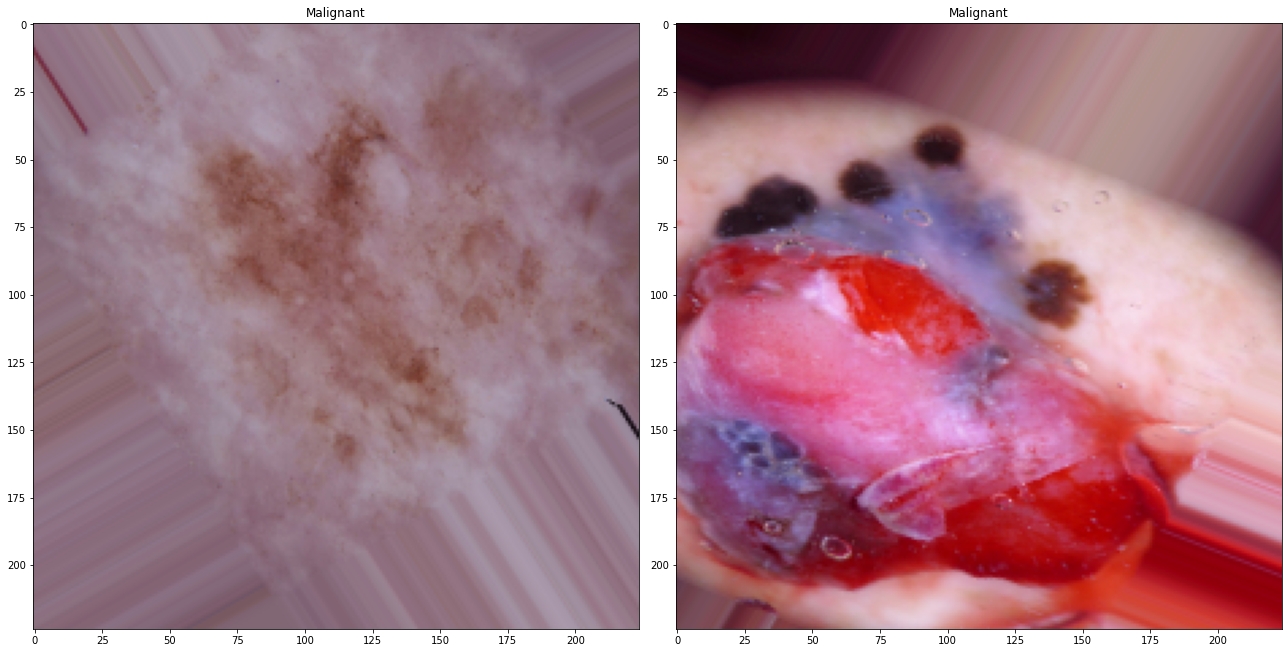

In [ ]:
from matplotlib import pyplot as plt
from random import randint

# Rescale
r_scale = 255.0

# Random Index
rIndex = randint(0, xTrain.shape[0]-2)

# Selecting random images from train subset
rimages = xTrain[rIndex:rIndex+2]
# label list{yLabel} -->  1 for malignant and 0 for benign
rImage_label = yTrain[rIndex:rIndex+2]
# In our data we have Label 0 for class Benign and 1 for class Malignant.
decodeLabelDict = {0:'Benign',1:'Malignant'}

# This function will plot images in the form of a grid with 1 row and 
# 2 columns where images are placed in each column.
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 2, figsize=(18,15))
  #axes = axes.flatten()
  for img, ax, label in zip(images_arr, axes, rImage_label):
    ax.imshow(img/r_scale)
    #ax.axis('off')
    ax.set_title(decodeLabelDict[label])
  plt.tight_layout()
  plt.show()

plotImages(rimages)

del r_scale

#for image in rimages:
#  print('Image size:',image.shape)

# Set Model Hyperparameters ---

In [ ]:
# Source: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam
from tensorflow.keras.optimizers import Adam

# Learning Raterce: 
global_learning_rate = 1E-4
# Apply AMSGrad variant of this algorithm from the paper "On the Convergence of Adam and beyond"
apply_amsgrad = False

global_optimizer = Adam(learning_rate=global_learning_rate,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=apply_amsgrad,name='Adam')

from tensorflow.keras.losses import SparseCategoricalCrossentropy
# Source: https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy
# Whether y_pred is expected to be a logits tensor.
logits_tensor = False
global_loss = SparseCategoricalCrossentropy(from_logits=logits_tensor)

# Source: https://www.tensorflow.org/api_docs/python/tf/keras/metrics
global_metrics=['accuracy']

# Number of epoches
global_epoches = 64

# Batch Size
gloab_bz_size = 32

# Early Stopping
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping

# To monitor validation loss
# Step to wait 
patience_epoches = 5
# Verbosity mode
v_bose4es = 1
# Whether to restore model weights from the epoch with the best value of the monitored quantity.
restore_weights = True 
#
to_take_care_of = 'val_loss'
#
to = 'min'

stopIf = EarlyStopping(monitor=to_take_care_of,min_delta=0,patience=patience_epoches,verbose=v_bose4es,mode=to,
                       baseline=None,restore_best_weights=restore_weights)

# Print Hyperparameters ---
print('Optimizer:',global_optimizer)
print('Loss:',global_loss)
print('Metrics:',global_metrics)

Optimizer: <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7f99df95b390>
Loss: <tensorflow.python.keras.losses.SparseCategoricalCrossentropy object at 0x7f99df95b208>
Metrics: ['accuracy']


# Set Learning Rate Scheduler ----

Thread count: 8
Variable Learning Rate per Epoch: ~


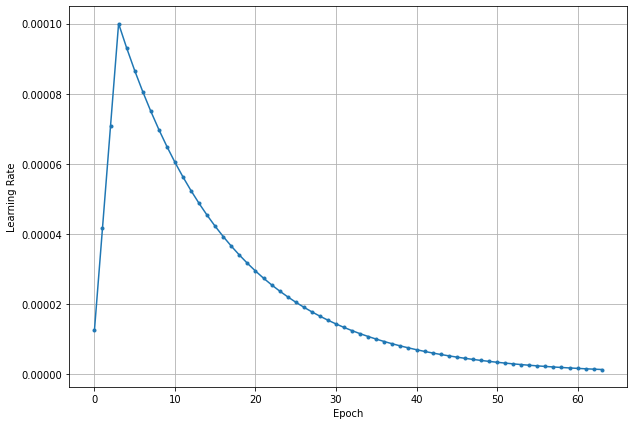

In [ ]:
# Set Variable Variable Learning Rate ---
from tensorflow.keras.callbacks import LearningRateScheduler
# Source: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler
# Example: https://www.tensorflow.org/tutorials/distribute/keras

tpu_thrd_count = strategy.num_replicas_in_sync
# Source: https://www.tensorflow.org/api_docs/python/tf/distribute/experimental/TPUStrategy#attributes_1
print('Thread count:',tpu_thrd_count)

from tensorflow.keras.optimizers.schedules import ExponentialDecay
# Source: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay

minimum_learning_rate = 1E-06
maximum_learning_rate = global_learning_rate
starting_learning_rate = global_learning_rate/tpu_thrd_count
power_epoch = global_epoches//20

lr_base_schedule_expo = ExponentialDecay(maximum_learning_rate,decay_steps=power_epoch,
                                         decay_rate=(minimum_learning_rate/maximum_learning_rate)**(1/(global_epoches/power_epoch)),
                                         staircase=False,name='Exponential_Decay')


def learning_rate_generator(epoch=None,learning_rate=None):
  if epoch<power_epoch:
    return ((maximum_learning_rate-starting_learning_rate)/power_epoch)*epoch+starting_learning_rate
  else:
    return lr_base_schedule_expo(epoch-power_epoch)
    

learning_rate_cntrl = LearningRateScheduler(learning_rate_generator,verbose=True)

from matplotlib import pyplot as plt
import numpy as np

# Plot Learning Rate
plt.figure(figsize=(10,7))
plt.plot(np.arange(global_epoches),[learning_rate_generator(value) for value in np.arange(global_epoches)],marker='.')
plt.xlabel('Epoch'),plt.ylabel('Learning Rate'),plt.grid()
print('Variable Learning Rate per Epoch: ~')

# Load Sample Model 

In [ ]:
%cd /content/drive/My\ Drive/Colab Notebooks/
from __supporting_modules__.my_cnn_models.keras_cancer_classifier_v1_0 import buildModel
%cd /
print('Got:',buildModel)

/content/drive/My Drive/Colab Notebooks
/
Got: <function buildModel at 0x7f99de10b1e0>


In [ ]:
# Load Sequential --- 
from tensorflow.keras import Sequential
# Source:https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

# Dropout rate
d_rate = 0.50

# Rescaling Factor 
rescale_factor = 1.0/255.0
 
# Source: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential 
# TPU Traning Source: https://www.tensorflow.org/guide/tpu#train_a_model_using_keras_high_level_apis
# Train a model using Keras high level APIs
# You can train a model simply with Keras fit/compile APIs. Nothing here is TPU specific, you would 
# write the same code below if you had mutliple GPUs and where using a MirroredStrategy rather than a TPUStrategy. 
# To learn more, check out the Distributed training with Keras tutorial.
with strategy.scope():
  # Laod Model 
  s_model_base = buildModel(input_shape_r=xTrain.shape[1:],classes=len(set(yTrain)),
                            dropout_rate=d_rate,clf_activator='softmax',mdl_name='keras_CC_2_v1_0')
  print('Base Model Summary: \n')
  s_model_base.summary()

  s_model = Sequential([Rescaling(rescale_factor,offset=0.0,name='Rescaling_1_255',
                                  input_shape=xTrain.shape[1:]),
                        s_model_base],
                       name='Sample_Skin_Cancer_Classifier_Model')

  del s_model_base

  # Compile The Model ---
  # Source: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile
  # TPU Source: https://www.tensorflow.org/guide/tpu#train_a_model_using_keras_high_level_apis
  # To reduce python overhead, and maximize the performance of your TPU, try out the experimental
  # experimental_steps_per_execution argument to Model.compile. It increases throughput by about 50% 
  # or more:
  s_model.compile(optimizer=global_optimizer,loss=global_loss,metrics=global_metrics,
                  experimental_steps_per_execution = 50,
                  loss_weights=None,sample_weight_mode=None, weighted_metrics=None)

  # Model Summary ---
  # Source: https://www.tensorflow.org/tutorials/images/classification#model_summary
  print('\n','---x---'*25,'\n','Final Model summary:\n',sep='')
  s_model.summary(line_length=None, positions=None, print_fn=None)

# To Plot Model ---
#from tensorflow.keras.utils import plot_model
#plot_model(model, to_file='keras_CC_2_v1.png',show_shapes=True,show_layer_names=True,rankdir='TB',
           #expand_nested=False, dpi=480)

Base Model Summary: 

Model: "keras_CC_2_v1_0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_0101_16x3x3 (Conv2D)  (None, 224, 224, 16)      448       
_________________________________________________________________
MaxPool_0201_2x2 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
Conv2D_0302_32 (Conv2D)      (None, 112, 112, 32)      4640      
_________________________________________________________________
MaxPool_0402_2x2 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
Conv2D_0503_64x3x3 (Conv2D)  (None, 56, 56, 64)        18496     
_________________________________________________________________
MaxPool_0603_2x2 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
DropOut_0701_50 (Dropout)    

In [ ]:
# Calculate Time Consumed
from time import time

# Source: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit

# steps_per_epoch:	Integer or None. Total number of steps (batches of samples) before declaring one epoch finished 
# and starting the next epoch.
stpEpoch = None
# verbose: 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. Note that the progress bar is not 
# particularly useful when logged to a file, so verbose=2 is recommended when not running interactively (eg, in a production environment).
v_bose = 2
# validation_freq:	Only relevant if validation data is provided. Integer or collections_abc.Container instance (e.g. list, tuple, etc.). 
# If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs 
# validation every 2 epochs.
vFrequency = 1
# List of keras.callbacks.Callback instances. List of callbacks to apply during training. See tf.keras.callbacks.
kCallBack = [stopIf,learning_rate_cntrl]

# Variable to calculate time taken by model in training. 
fooTime = time()

# Training Model 
s_model_history = s_model.fit(xTrain.astype(np.float32),yTrain.astype(np.float32),batch_size=gloab_bz_size,
                              shuffle=True,epochs=global_epoches,steps_per_epoch=stpEpoch,verbose=v_bose,
                              callbacks=kCallBack,
                              validation_data=(xValid.astype(np.float32),yValid.astype(np.float32)),
                              validation_freq=vFrequency,max_queue_size=10,workers=1,use_multiprocessing=False)

fooTime = time() - fooTime
print('\nTotal Time Taken in Model Training: --',fooTime,'seconds')


Epoch 00001: LearningRateScheduler reducing learning rate to 1.25e-05.
Epoch 1/64
Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.


Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.


87/87 - 22s - loss: 0.6412 - accuracy: 0.6461 - val_loss: 0.5539 - val_accuracy: 0.7430

Epoch 00002: LearningRateScheduler reducing learning rate to 4.1666666666666665e-05.
Epoch 2/64
87/87 - 2s - loss: 0.4059 - accuracy: 0.8265 - val_loss: 0.3105 - val_accuracy: 0.8903

Epoch 00003: LearningRateScheduler reducing learning rate to 7.083333333333334e-05.
Epoch 3/64
87/87 - 2s - loss: 0.2982 - accuracy: 0.8860 - val_loss: 0.2639 - val_accuracy: 0.8925

Epoch 00004: LearningRateScheduler reducing learning rate to tf.Tensor(1e-04, shape=(), dtype=float32).
Epoch 4/64
87/87 - 1s - loss: 0.2573 - accuracy: 0.8995 - val_loss: 0.2690 - val_accuracy: 0.8837

Epoch 00005: LearningRateScheduler reducing learning rate to tf.Tensor(9.30572e-05, shape=(), dtype=float32).
Epoch 5/64
87/87 - 2s - loss: 0.2347 - accuracy: 0.9151 - val_loss: 0.2079 - val_accuracy: 0.9337

Epoch 00006: LearningRateScheduler reducing learning rate to tf.Tensor(8.6596425e-05, shape=(), dtype=float32).
Epoch 6/64
87/87 - 1

**Plot traning History ---**

In [ ]:
import pandas as pd
pd.DataFrame(s_model_history.history).tail()

,loss,accuracy,val_loss,val_accuracy,lr
10,0.148448,0.946280,0.191611,0.942563,0.000060
11,0.146824,0.946643,0.177294,0.935199,0.000056
12,0.136486,0.947731,0.175571,0.941826,0.000052
13,0.135943,0.950998,0.190711,0.942563,0.000049
14,0.130404,0.953902,0.177237,0.932253,0.000045


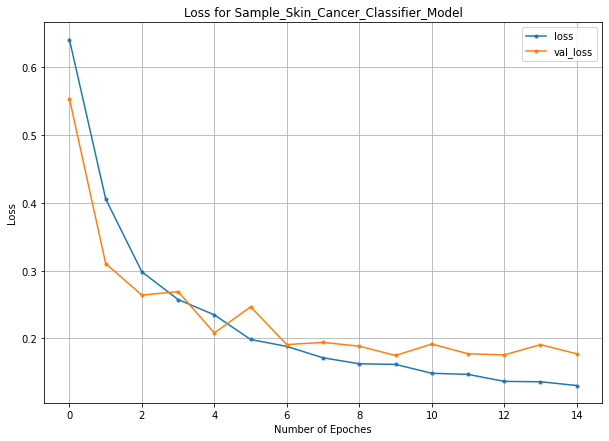

In [ ]:
pd.DataFrame(s_model_history.history)[['loss','val_loss']].plot(marker='.',figsize=(10,7))
plt.grid(),plt.xlabel('Number of Epoches'),plt.ylabel('Loss'),plt.title('Loss for Sample_Skin_Cancer_Classifier_Model')
plt.show()

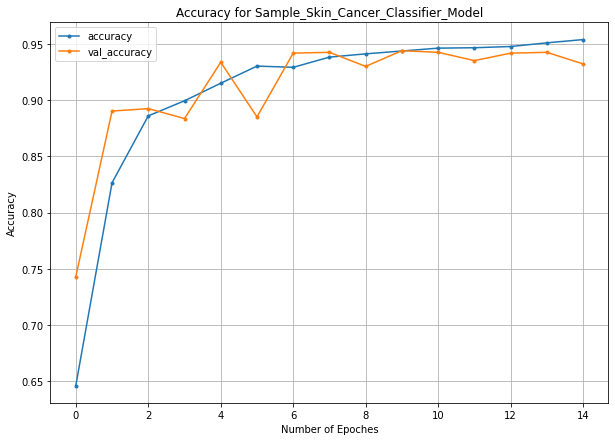

In [ ]:
pd.DataFrame(s_model_history.history)[['accuracy','val_accuracy']].plot(marker='.',figsize=(10,7))
plt.grid(),plt.xlabel('Number of Epoches'),plt.ylabel('Accuracy'),plt.title('Accuracy for Sample_Skin_Cancer_Classifier_Model')
plt.show()

**Save History As CSV ---**

In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/__mdls_history__/conference_paper_result
model_name = 'sample_model_tpu'
make_Directory(model_name)
pd.DataFrame(s_model_history.history).to_csv(model_name+r'/'+f'sample_model_tpu.csv')
print('History saved at:\n',model_name+r'/'+f'sample_model_tpu.csv',sep='')

/content/drive/My Drive/Colab Notebooks/__mdls_history__/conference_paper_result
Directory already exits...
Recreating directory...
Successfully created the directory sample_model_tpu
History saved at:
sample_model_tpu/sample_model_tpu.csv


**Evaluate Model ---**

In [ ]:
# Source: https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate

s_model.evaluate(xTest.astype(np.float32),yTest.astype(np.float32),verbose=1,sample_weight=None, steps=None,callbacks=None,
                 max_queue_size=10,workers=1, use_multiprocessing=False,return_dict=True)

15/15 [==============================] - 0s 11ms/step - loss: 0.1622 - accuracy: 0.9497


{'accuracy': 0.9496718049049377, 'loss': 0.16215887665748596}

**Save Test Results ---**

In [ ]:
# Source: https://www.tensorflow.org/api_docs/python/tf/keras/Model

# Verbose --- Epoch Printing Style
v_bose = 1

# Doing Predection from model ---
y_prediction = s_model.predict(xTest.astype(np.float32),batch_size=None,verbose=v_bose,steps=None,
                               callbacks=None,max_queue_size=10,workers=1,use_multiprocessing=False)

# Saving Outputs ---
np.save(model_name+r'/'+f'sample_model_tpu_prediction',y_prediction,allow_pickle=True,fix_imports=True)
print('Predections Save at:\n',model_name+r'/'+f'sample_model_tpu_test_prediction')

# Saving True Values --- 
np.save(model_name+r'/'+f'sample_model_tpu_ground_truth_images',xTest,allow_pickle=True,fix_imports=True)
np.save(model_name+r'/'+f'sample_model_tpu_ground_truth_labels',yTest,allow_pickle=True,fix_imports=True)
print('Ground Truth Saved')
%cd /content

15/15 [==============================] - 7s 443ms/step
Predections Save at:
 sample_model_tpu/sample_model_tpu_test_prediction
Ground Truth Saved
/content


**View Predection/Evaluation ---**

Test Result --


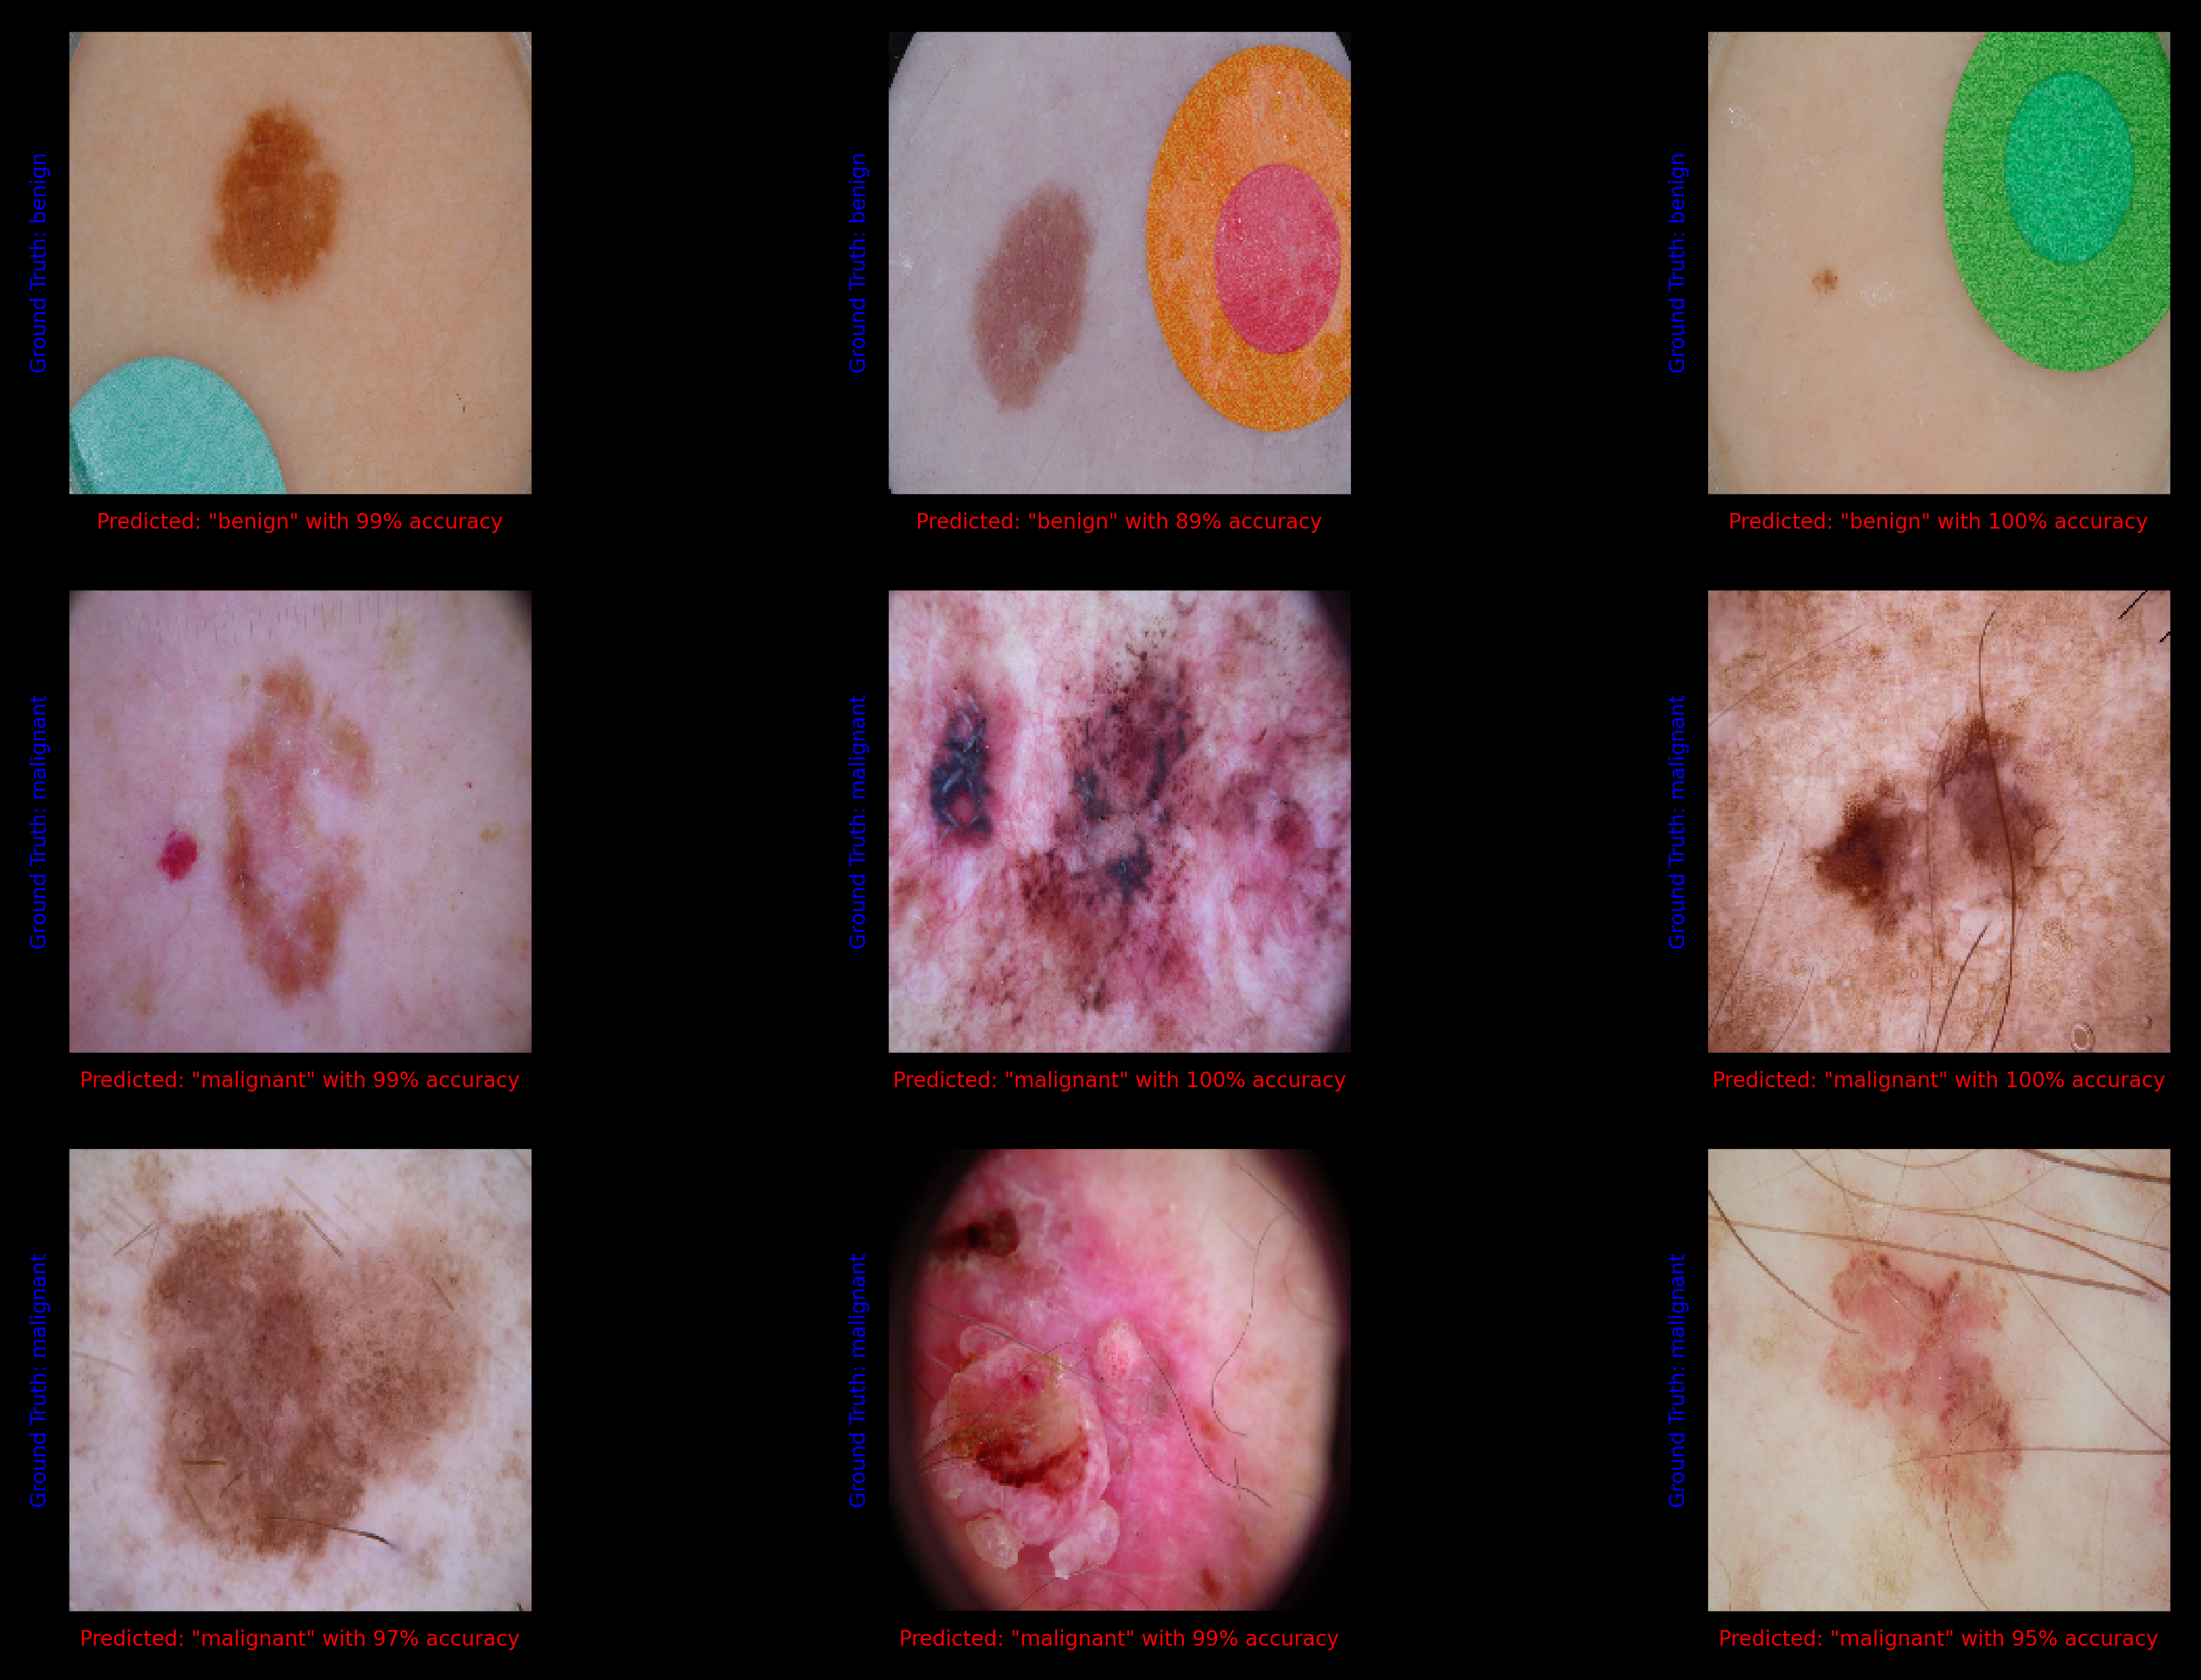

In [ ]:
# Select Random 9 Images
number_of_Images_2_plot = 9
begin_from = np.random.randint(0,high=xTest.shape[0]-number_of_Images_2_plot)

# Image Labels 
class_label_list = ["benign","malignant"]

plt.figure(num=None,figsize=(10,7),dpi=480,facecolor='black')
print('Test Result --')


for plot_number,image_number in enumerate(range(begin_from,begin_from+number_of_Images_2_plot),1):
  plt.subplot(3,3,plot_number)
  plt.imshow(xTest[image_number]/255.0,cmap=None,norm=None,aspect=None,interpolation=None,alpha=None)
  plt.xticks([]),plt.yticks([])
  class_label_predected = class_label_list[list(y_prediction[image_number]).index(y_prediction[image_number].max())]
  plt.xlabel('Predicted: "{}" with {:2.0f}% accuracy'.format(class_label_predected,
                                                     round(np.max(y_prediction[image_number])*100,2)),
             fontsize=5,color='red')
  plt.ylabel('Ground Truth: {}'.format(class_label_list[yTest[image_number]]),fontsize=5,color='blue')
plt.show()

**Calculate AUC Metrics---**

In [ ]:
print('Assuming {"benign":0, "malignant":1}')

# Separating label into base classes
# Setting for benign class
y_true_benign = yTest.copy().astype(np.int32)
y_true_benign[yTest == 1] = -1
y_true_benign[y_true_benign == 0] = 1
y_true_benign[y_true_benign == -1] = 0
# Setting for malignant class
y_true_malignant = yTest.copy()

# Calculating AUC -- Area Under the ROC(Receiver Operating Characteristic) curve.
# Source: https://www.tensorflow.org/api_docs/python/tf/keras/metrics/AUC
from tensorflow.keras.metrics import AUC

auc_calculator = AUC(num_thresholds=200,curve='ROC',summation_method='interpolation',name=None,
                     dtype=None,thresholds=None,multi_label=False,label_weights=None)


# Calculate AUC for benign class
# update_state(y_true, y_pred, sample_weight=None)
auc_calculator.update_state(y_true_benign,y_prediction[:,0], sample_weight=None)
print('AUC for class benign[0]:',auc_calculator.result().numpy()*100)
auc_calculator.reset_states()


# Calculate AUC for malignant class 
# update_state(y_true, y_pred, sample_weight=None)
auc_calculator.update_state(y_true_malignant,y_prediction[:,1], sample_weight=None)
print('AUC for class malignant[1]:',auc_calculator.result().numpy()*100)
auc_calculator.reset_states()

Assuming {"benign":0, "malignant":1}
AUC for class benign[0]: 98.01350831985474
AUC for class malignant[1]: 98.01350235939026


**Save Model ---**

In [ ]:
# Source: https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model
%cd /content/drive/My Drive/Colab Notebooks/__models__/conference_paper_saved_models
model_name = 'sample_model_tpu'
make_Directory(model_name)
#s_model.save('sample_model_tpu/original',overwrite=True,include_optimizer=True,save_format=None,signatures=None,options=None)
s_model.save('sample_model_tpu/sample_model.h5',overwrite=True,include_optimizer=True,save_format='h5',signatures=None,options=None)
%cd /content

/content/drive/My Drive/Colab Notebooks/__models__/conference_paper_saved_models
Directory already exits...
Recreating directory...
Successfully created the directory sample_model_tpu
/content


**Clear Session ----**

In [ ]:
del s_model,s_model_history
from tensorflow.keras.backend import clear_session
# If we need to clear the session .
clear_session()